In [ ]:
from bs4 import BeautifulSoup
import sys

def logL(x):
    
    #print(seq1[10],seq2[10])
    LogL = 0
    #len(seq1) -1
    for i in range(1,100): 
        
        #Tree structure, this should come from a .nex file
        N = 20
        #Sample size per loci
        n = 100
        T = Tree(np.array([[1,2],[3,4],[5,6]]),np.array([5,5,6,7,6,7]),x)
        #T = Tree(np.array([[1,2]]),np.array([3,3]),x)
        #Given frequency
        C = np.array([int(seq1[i]),int(seq2[i]),int(seq3[i]),int(seq4[i])])
        #Get Chebychev Coefficients of initial condition
        CC = np.zeros([len(C),N+1])
        for i in range(0,len(C)):
            CC[i] = Chebychev_transform2(n_sample,C[i],N) 
        #selection and mutation (multiply u,v by 2)    
        a = np.array([[0.006,-0.012,0,0],[0.005,-0.01,0,0]])
        #genetic drift
        b = np.array([0,0.5,-0.5,0])
        LogL += Tree_integrator(T,C,N,n,CC,a,b)
    return LogL


def BranchSupp(x):
	return all(0 < x )&all(x < 20)
###          we define the objective function with the U function
###          which is -log of the density function.
###          The support is defined in a separate function.
###   The dimension of the parameter space is n

'''Get the SimSnap simulations into format '''
handler = open("testSimSnap_tree_1.xml","r" )
contents = handler.read()
soup = BeautifulSoup(contents,'xml')
sequence = soup.find_all('sequence')
seq1 = sequence[0].text
seq2 = sequence[1].text
seq3 = sequence[2].text
seq4 = sequence[3].text
seq1 = seq1.split(",")
seq2 = seq2.split(",")
seq3 = seq3.split(",")
seq4 = seq4.split(",")

Tree_Inference = pytwalk( n=6, U=logL, Supp=BranchSupp)

#### This would run the twalk

Tree_Inference.Run( T=10000, x0=1*np.ones(6), xp0=2*np.ones(6))

Tree_Inference.Save("Tree_Inference_twalk1.dat")

#Gets output into Tracer format
x = Tree_Inference.Output
n = np.shape(x)
z = np.zeros([int(n[0])+1, int(n[1])+1])
z[1:,1:] = x
y = np.arange(0,n[0] +1)
z[:,0] = y
header = np.arange(1,n[1]+1)
header_str = str(np.arange(1,n[1]+1))
header_str = header_str[1:-1]
header_str = header_str.replace(" ", "\t")
np.savetxt( 'test.log', z, delimiter='\t', header='state' + header_str )

#Tree_Inference.Ana
#Tree_Inference.Hist( par=0 )

#plt.show()
#Tree_Inference.Hist( par=1 )
#plt.show()
#Tree_Inference.Hist( par=2 )
#plt.show()
#Tree_Inference.Hist( par=3 )
#plt.show()
#Tree_Inference.Hist( par=4 )
#plt.show()
#Tree_Inference.Hist( par=5 )
#plt.show()


pytwalk: Running the twalk with 10000 iterations. Fri, 01 Jun 2018, 13:10.


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


       Finish by Sat, 02 Jun 2018, 03:20.


C:\Users\Gorilla Rig\Dropbox\MarnusDiffusions\Code\pytwalk.py:334: RuntimeWarning: overflow encountered in exp
  A = exp((u - u_prop) +  (self.nphi-2)*log(beta))
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling t

pytwalk:          8 iterations so far. Finish by Sat, 02 Jun 2018, 10:00.


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)


pytwalk:         32 iterations so far. Finish by Sat, 02 Jun 2018, 05:43.


C:\Users\Gorilla Rig\Dropbox\MarnusDiffusions\Code\pytwalk.py:278: RuntimeWarning: overflow encountered in exp
  A = exp(up - up_prop)


pytwalk:         64 iterations so far. Finish by Sat, 02 Jun 2018, 04:53.
pytwalk:        128 iterations so far. Finish by Sat, 02 Jun 2018, 03:25.
pytwalk:        256 iterations so far. Finish by Sat, 02 Jun 2018, 03:07.
pytwalk:       1024 iterations so far. Finish by Fri, 01 Jun 2018, 21:35.


In [14]:
from bs4 import BeautifulSoup
import sys
import matplotlib.pyplot as plt
import numpy as np

handler = open("testSimSnap_tree_1.xml","r" )
contents = handler.read()
soup = BeautifulSoup(contents,'xml')
sequence = soup.find_all('sequence')

seq1 = sequence[0].text
seq2 = sequence[1].text


seq1 = seq1.split(",")
seq2 = seq2.split(",")


seq1 =np.asarray(seq1[1:-1]).astype(np.float)
seq2 =np.asarray(seq2[1:-1]).astype(np.float)
print(len(seq1[1:-1]))
print(np.sum(seq1[1:-1]), np.sum(seq2[1:-1]))

997
49064.0 48646.0


Mean for parameter 0= 0.004414


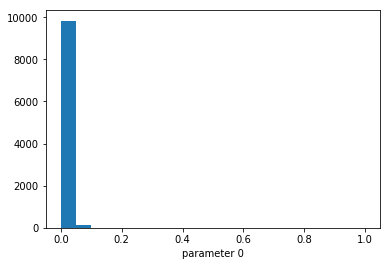

Mean for parameter 1= 0.930731


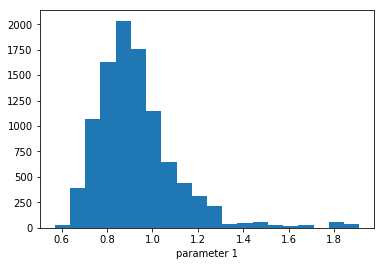

Mean for parameter 2= 1134.198088


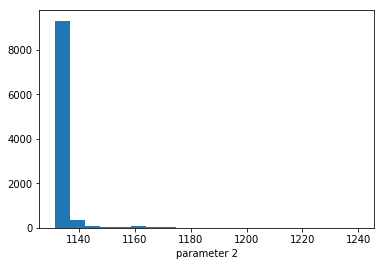

In [81]:
Tree_Inference.Ana
Tree_Inference.Hist( par=0 )

plt.show()
Tree_Inference.Hist( par=1 )
plt.show()
Tree_Inference.Hist( par=2 )
plt.show()


In [1]:
#matched with the MATLAB code output
%matplotlib inline
import scipy.integrate as integrate
import scipy as sp
import scipy.stats as sps
import numpy as np
import numpy.polynomial.chebyshev as ch
from numpy.linalg import inv
from scipy.linalg import expm
import matplotlib.pyplot as plt
import numpy.polynomial.chebyshev as ch
from pytwalk import * 
from scipy.sparse import lil_matrix

class Tree:
    def __init__(self,structure_pc, structure_cp, time):
        self.structure_pc = structure_pc 
        self.structure_cp = structure_cp
        self.time = time
        
def x_times_Tx(N): #Transpose of Operator B defined as x*f(x) (Gordon's thesis Propositon.5 page. 78)
    B = sp.sparse.diags([0.25, 0.5, 0.25], [-1, 0, 1], shape=(N, N)).toarray()
    B[1,0] = 0.5
    return B

def Chebychev_transform2(n,m,N):
    x = np.linspace(0,1,n)
    f = sps.binom.pmf(m, n, x, loc=0)
    #specify Chebychev bases
    chebexp_shift = ch.Chebyshev.fit(x,f,N,domain=[0,1])
    return chebexp_shift.coef

def Dd(N): #Derivative operator
    N = N - 4
    D = np.zeros([N+4,N+4])
    D[0,np.arange(1,N+4,2)] = 2*np.arange(1,N+4,2)
    for i in range(0,N+2):
        D[i+1,np.arange(i+2,N+4,2)] = 4*(np.arange(i+1,N+3,2)+1)
    return D

def Tree_integrator(T,C,N,n_sample,CC,a,b): #will have to add beta distribution variables
    nnodes = np.shape(T.structure_cp)[0] + 1 #have to get this from the tree
    n = (nnodes+1.)/2.
    F = np.zeros([N,nnodes])
    logL = 0
    
    #4.5 Proposition 5 Operator B
    S = x_times_Tx(N)
    S2 = np.dot(S,S)
    S3 = np.dot(S2,S)
    #Have to figure this out   
    
    D = Dd(N)
    print(D)
    D2 = np.dot(D,D)
    
    M = (a[0,0]*D) + (a[0,1]*np.dot(S,D)) + (a[0,2]*np.dot(S2,D)) + (a[0,3]*np.dot(S3,D)) + .5*((b[0]*D2) + (b[1]*np.dot(S,D2)) + (b[2]*np.dot(S2,D2))) 
    Msparse = lil_matrix(M)
    
#---step1-a---    
    j=0
    for i in range(0,int(n)): 
        tt = T.time[i] #branch length
        #these points have to be consistent with the number of points
        cc = CC[i,:]   
        j += 1
        p = np.arange(0,1+1/100,1/100)
#plotty mcplotface
        #chebpts = ch.chebval(2*p-1,  cc)
        #plt.title("Initial distribution " +str(i))
        #plt.plot(p,chebpts)
        #plt.show()
#---step1-b,c---
        Msparse_e = (expm(Msparse*tt))
        %timeit Msparse_e.dot(cc[:-1])
        F[:,i] = Msparse_e.dot(cc[:-1])
        
#plotty mcplotface
        #p = np.arange(0,1+1/100,1/100)
        #chebpts = ch.chebval(2*p-1,  F[:,i])
        #plt.plot(p,chebpts)
        #print(i,tt,np.sum(F[:,i]))
#---step2---  
    #Adhoc for now, have do it properly
    M = (a[1,0]*D) + (a[1,1]*np.dot(S,D)) + (a[1,2]*np.dot(S2,D)) + (a[1,3]*np.dot(S3,D)) + .5*((b[0]*D2) + (b[1]*np.dot(S,D2)) + (b[2]*np.dot(S2,D2))) 
    Msparse = lil_matrix(M)
    for i in range(int(n),nnodes-1):
#---step2-a,b,c---
        u = T.structure_pc[i - int(n),0]
        v = T.structure_pc[i - int(n),1]
        F1 = F[:,u-1]
        F2 = F[:,v-1]
        #print(u,np.sum(F1),v,np.sum(F2))
        tt = T.time[i]
#---step2d---
#   4.3.3  Proposition 1
        F1chebpts = ch.chebval(2*p-1,  F1)
        F2chebpts = ch.chebval(2*p-1,  F2)
#plotty mcplotface        
        #plt.plot(p,F1chebpts)
        #plt.plot(p,F2chebpts)
        #plt.plot(p,F1chebpts*F2chebpts)
        #plt.show()
        
        Ffit = ch.Chebyshev.fit(p,F1chebpts*F2chebpts,N,domain=[0,1])
        cc = Ffit.coef    
        
#---step2-e,f---
       
        Msparse_e = (expm(Msparse*tt))
        F[:,i] = Msparse_e.dot(cc[:-1])
        #chebpts = ch.chebval(2*p-1,  F[:,i])
        #plt.plot(p,chebpts)
        #plt.show()
#---step3---
    
    r = nnodes - 1
    u = T.structure_pc[r - int(n),0]
    v = T.structure_pc[r - int(n),1]
#---step4,5---
    F1 = F[:,u-1]
    F2 = F[:,v-1]
    #print(u,np.sum(F1),v,np.sum(F2))
#---step6---

#---step7--- mush stationary distribution together
    #F1chebpts = ch.chebval(2*p-1,  F1)
    #F2chebpts = ch.chebval(2*p-1,  F2)
    #stationary = sps.beta.pdf(p,2*a[0],-2*(a[1]+a[0]))
#plotty mcplot face    
    #plt.plot(p,F1chebpts)
    #plt.show()
    #plt.plot(p,F2chebpts)
    #plt.show()
    #plt.plot(p,stationary)
    #plt.show()
    
    f = lambda p: ch.chebval(2*p-1, F1)*ch.chebval(2*p-1, F2)*sps.beta.pdf(p,0.006,0.006)
    result = integrate.quad(f, 0, 1)
#---step7---
    
    like = result[0]
    #print(like)
    if 1>=like>=0:
        logL = np.log(like)
    else:
        logL = -10000
    
    return -logL

#Tree structure, this should come from a .nex file
N = 20
n_sample = 100
T = Tree(np.array([[1,2],[3,4],[5,6]]),np.array([5,5,6,7,6,7]),np.array([0.1,0.1,0.1,0.1,0.1,0.1]))
#T = Tree(np.array([[1,2]]),np.array([3,3]),np.array([0.1,1]))
#Given frequency
C = np.array([60,70, 65,50])

#Get Chebychev Coefficients of initial condition
CC = np.zeros([len(C),N+1])
for i in range(0,len(C)):
    CC[i] = Chebychev_transform2(n_sample,C[i],N)  
    
#C = np.array([31,100])
#selection and mutation    
a = np.array([[.5,-1,0,0],[.4,-0.5,0,0]])
#genetic drift
b = np.array([0,0.5,-0.5,0])
%timeit Tree_integrator(T,C,N,n_sample,CC,a,b)

[[ 0.  2.  0.  6.  0. 10.  0. 14.  0. 18.  0. 22.  0. 26.  0. 30.  0. 34.
   0. 38.]
 [ 0.  0.  8.  0. 16.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0. 12.  0. 20.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0. 16.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0. 20.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 48.  0. 56.  0.

C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.69 µs ± 117 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.85 µs ± 333 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.63 µs ± 256 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.91 µs ± 235 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
[[ 0.  2.  0.  6.  0. 10.  0. 14.  0. 18.  0. 22.  0. 26.  0. 30.  0. 34.
   0. 38.]
 [ 0.  0.  8.  0. 16.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0. 12.  0. 20.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0. 16.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0. 20.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 44.  0. 52.  0. 60.  0. 68.
  

C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


4.05 µs ± 342 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.74 µs ± 67.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.61 µs ± 91.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.65 µs ± 58.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
[[ 0.  2.  0.  6.  0. 10.  0. 14.  0. 18.  0. 22.  0. 26.  0. 30.  0. 34.
   0. 38.]
 [ 0.  0.  8.  0. 16.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0. 12.  0. 20.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0. 16.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0. 20.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 44.  0. 52.  0. 60.  0. 68.
 

C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.69 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.65 µs ± 107 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.59 µs ± 10.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.68 µs ± 68.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
[[ 0.  2.  0.  6.  0. 10.  0. 14.  0. 18.  0. 22.  0. 26.  0. 30.  0. 34.
   0. 38.]
 [ 0.  0.  8.  0. 16.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0. 12.  0. 20.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0. 16.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0. 20.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 44.  0. 52.  0. 60.  0. 68.
 

C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.76 µs ± 166 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.86 µs ± 223 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.77 µs ± 180 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.95 µs ± 372 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
[[ 0.  2.  0.  6.  0. 10.  0. 14.  0. 18.  0. 22.  0. 26.  0. 30.  0. 34.
   0. 38.]
 [ 0.  0.  8.  0. 16.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0. 12.  0. 20.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0. 16.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0. 20.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 44.  0. 52.  0. 60.  0. 68.
  

C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.91 µs ± 113 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.85 µs ± 234 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.87 µs ± 391 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.95 µs ± 247 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
[[ 0.  2.  0.  6.  0. 10.  0. 14.  0. 18.  0. 22.  0. 26.  0. 30.  0. 34.
   0. 38.]
 [ 0.  0.  8.  0. 16.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0. 12.  0. 20.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0. 16.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0. 20.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 44.  0. 52.  0. 60.  0. 68.
  

C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.73 µs ± 239 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.69 µs ± 157 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.62 µs ± 16.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.63 µs ± 30.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
[[ 0.  2.  0.  6.  0. 10.  0. 14.  0. 18.  0. 22.  0. 26.  0. 30.  0. 34.
   0. 38.]
 [ 0.  0.  8.  0. 16.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0. 12.  0. 20.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0. 16.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0. 20.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 44.  0. 52.  0. 60.  0. 68.
 

C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.93 µs ± 149 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.99 µs ± 217 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.76 µs ± 139 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


4.21 µs ± 534 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
[[ 0.  2.  0.  6.  0. 10.  0. 14.  0. 18.  0. 22.  0. 26.  0. 30.  0. 34.
   0. 38.]
 [ 0.  0.  8.  0. 16.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0. 12.  0. 20.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0. 16.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0. 20.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0. 24.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 28.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 32.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 36.  0. 44.  0. 52.  0. 60.  0. 68.
   0. 76.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 40.  0. 48.  0. 56.  0. 64.  0.
  72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 44.  0. 52.  0. 60.  0. 68.
  

C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.79 µs ± 339 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.66 µs ± 96.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.66 µs ± 76.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


3.66 µs ± 126 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
12.4 s ± 350 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\Gorilla Rig\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


In [17]:
#Get Generational time from SNAPP parameters
print(0.024/(0.006/(4*1000)))

16000.0


In [11]:
print(Tree_Inference.x)

[1.99283616 1.92848371 1.9887076  1.99453228 1.86489979 1.98502936]


In [3]:
help(ch.Chebyshev.fit)

Help on method fit in module numpy.polynomial._polybase:

fit(x, y, deg, domain=None, rcond=None, full=False, w=None, window=None) method of builtins.type instance
    Least squares fit to data.
    
    Return a series instance that is the least squares fit to the data
    `y` sampled at `x`. The domain of the returned instance can be
    specified and this will often result in a superior fit with less
    chance of ill conditioning.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int or 1-D array_like
        Degree(s) of the fitting polynomials. If `deg` is a single integer
        all terms up to and including the `deg`'th term are included in t

In [21]:
from scipy import sparse
from numpy import array
I = array([0,3,1,0])
J = array([0,3,1,2])
V = array([4,5,7,9])
A = sparse.coo_matrix((V,(I,J)),shape=(4,4))
print(A)

  (0, 0)	4
  (3, 3)	5
  (1, 1)	7
  (0, 2)	9


In [19]:
I = array([0,0,1,3,1,0,0])
J = array([0,2,1,3,1,0,0])
V = array([1,1,1,1,1,1,1])
B = sparse.coo_matrix((V,(I,J)),shape=(4,4)).tocsr()
print(B)

  (0, 0)	3
  (0, 2)	1
  (1, 1)	2
  (3, 3)	1
